# Loan Approval System 

In this notebook, I am going to show you that how different ML & DL models   
perform on a credit risk modeling dataset, where we will predict which of the customers will have their loan approved.

## About dataset 

*The dataset has 614 rows and 13 different features, including the **target variable(Loan_Status)**. The data contains following features in it:* 



1.   **Loan_ID**: A unique loan id
2.   **Gender**: Male/Female
3.   **Married:**Yes/No
4.   **Dependents:**Number of poeple depending on applicant
5.   **Education:**Applicant's education--Graduate/Not Gradudate
6.   **Self_Employed:**Yes/No
7.   **AppicantIncome:** Income of applicant($)

8.   **CoapplicantIncome:**Income of co-applicant($)

9.   **LoanAmount:**Loan amount($ thousands)
10.  **Loan_Amount_Term**:Term for borrowing money(weeks)
11.  **Credit_History:**Applicant's credit history 
12.  **Property_Area:**Urban/Rural/Semi
13.  **Loan_Status:**Loan Approved (Yes/No)






## Importing Libraries 

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [95]:
data = pd.read_csv("/content/drive/MyDrive/Data Set /train_loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Explatory Data Analysis 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [97]:
data.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [98]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [99]:
data.shape

(614, 13)

In [100]:
data.duplicated().count()

614

In [101]:
data.drop_duplicates(inplace = True)

#### lets check, what is the percenatage of data approval 

In [102]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [103]:
approved =(data.Loan_Status.value_counts()[0]/data.shape[0])*100
rejected =(data.Loan_Status.value_counts()[1]/data.shape[0])*100
print(approved)
print(rejected)

68.72964169381108
31.27035830618892


people whose loan has been approved: 68.72964169381108
people whose loan has been rejected: 31.27035830618892


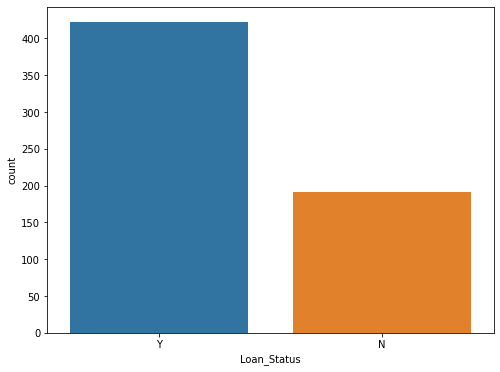

In [104]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = "Loan_Status")
print("people whose loan has been approved:", approved)
print("people whose loan has been rejected:", rejected)

#### lets check why most of the people get approved their loan

In [105]:
data.corr()*100 # applicant income playing very important role

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,100.000000,-11.660458,57.090904,-4.530609,-1.471488
CoapplicantIncome,-11.660458,100.000000,18.861940,-5.987801,-0.205628
LoanAmount,57.090904,18.861940,100.000000,3.944725,-0.843277
Loan_Amount_Term,-4.530609,-5.987801,3.944725,100.000000,0.147011
Credit_History,-1.471488,-0.205628,-0.843277,0.147011,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


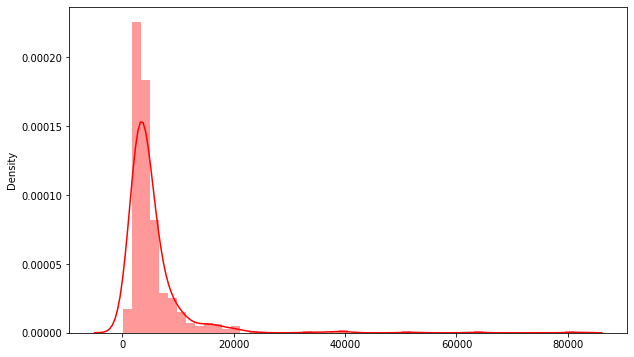

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(x= data["ApplicantIncome"], color="red" )  # we can see most of the of the people who have 0 to 2000$ income level they got loan approval 

In [107]:
l_aprvd = data[data["Loan_Status"]=="Y"]



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


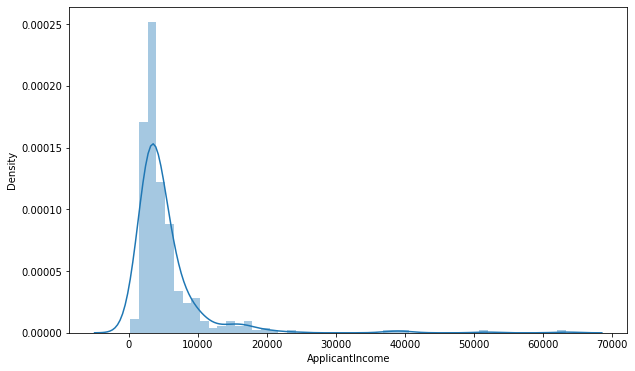

In [108]:
plt.figure(figsize= (10,6))
sns.distplot(l_aprvd["ApplicantIncome"])

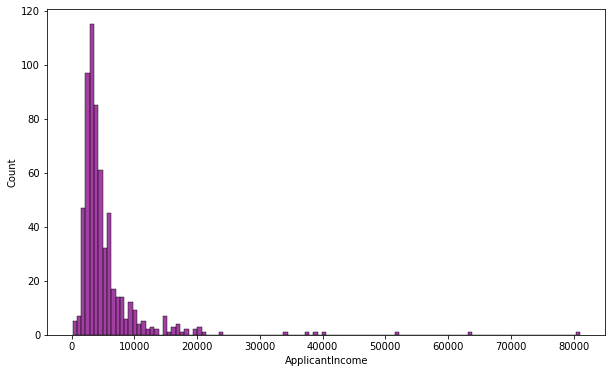

In [109]:
plt.figure(figsize=(10,6))
sns.histplot(x= data["ApplicantIncome"], color="purple" )  # we can see most of the of the people who have 0 to 2000$ income level they got loan approval 

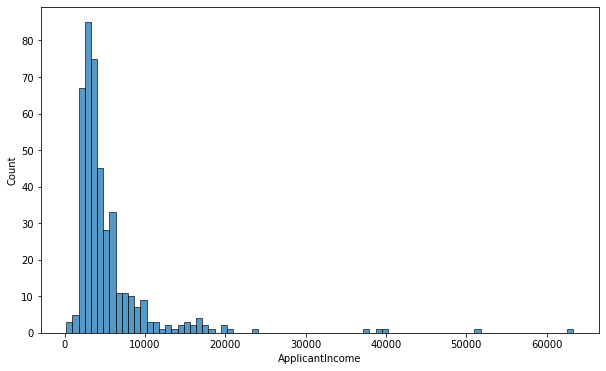

In [110]:
plt.figure(figsize= (10,6))
sns.histplot(l_aprvd["ApplicantIncome"])

### We concluded that most of the people have income between 0 to 2000$ 

In [111]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


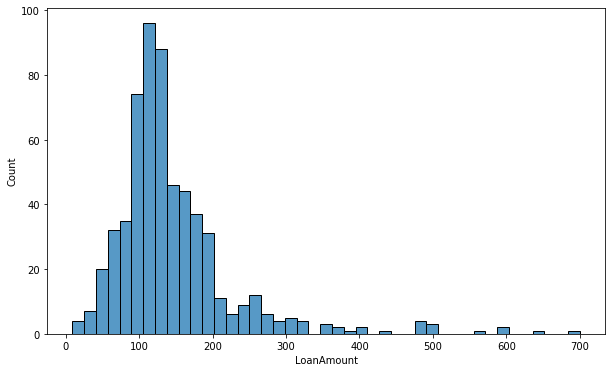

In [112]:
plt.figure(figsize=(10,6))
sns.histplot(data["LoanAmount"])    # loan approved who are asking from 10K to 200K $ 

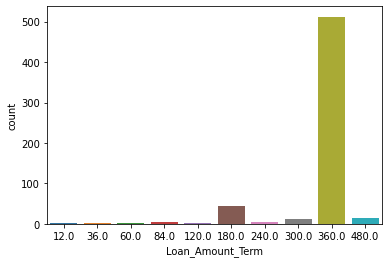

In [113]:
sns.countplot(data = data, x = "Loan_Amount_Term")  # mostly people ask for 360 weeks 

<Figure size 720x576 with 0 Axes>

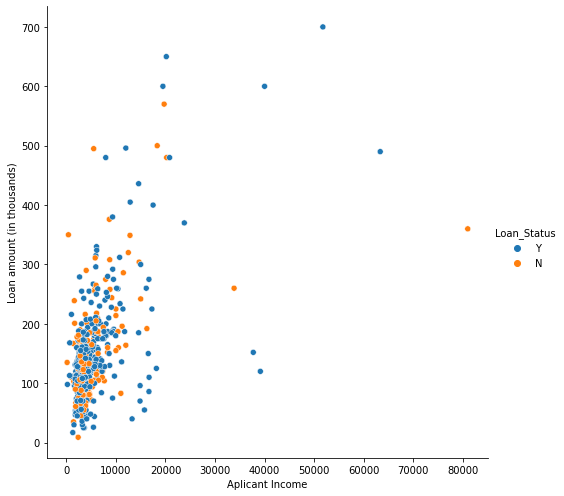

In [114]:
plt.figure(figsize=(10,8))
sns.relplot(x= "ApplicantIncome",y = "LoanAmount", hue = "Loan_Status", data = data, height = 7.0)
plt.xlabel("Aplicant Income")
plt.ylabel("Loan amount (in thousands)")
plt.show()

In [115]:
m_l_a = ((l_aprvd[l_aprvd["Gender"] == "Male"]).count()[1]/612)*100
f_l_a = 100-m_l_a

Proportion of loan approval in male: 55.392156862745104
Proportion of loan approval in female: 44.607843137254896


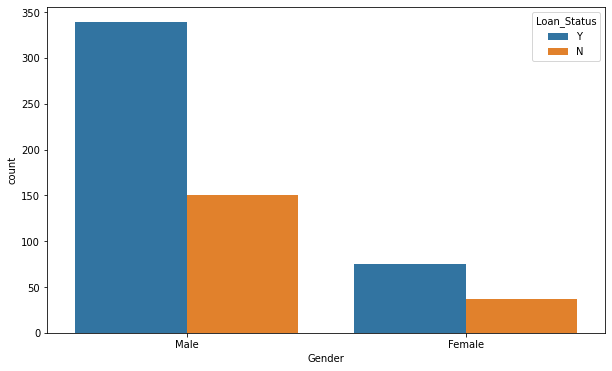

In [116]:
plt.figure(figsize =(10,6))
sns.countplot(x="Gender", data = data, hue="Loan_Status")
print("Proportion of loan approval in male:" , m_l_a)
print("Proportion of loan approval in female:" , f_l_a)

In [117]:
data[data["ApplicantIncome"] == 81000]     

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


### here we can see that people who have got approved their loan is between below 20K and amount loan below 300K

In [118]:
mar_ap = ((l_aprvd[l_aprvd["Married"] == "Yes"]).count()[2]/l_aprvd.count()[2])*100
mar_nap = 100 - mar_ap
mar_nap

31.980906921241044

In [119]:
nmarr_ap = (l_aprvd[l_aprvd["Married"] == "No"].count()[2]/l_aprvd.count()[2])*100
nmarr_nap = 100-nmarr_ap
nmarr_nap

68.01909307875896

Those who are married and got loan approved: 68.01909307875896
Those who are married and do not get loan approved: 31.980906921241044
Those who are not married but get loan approved: 31.980906921241047
Those who are not married and also do not get loan approved: 68.01909307875896


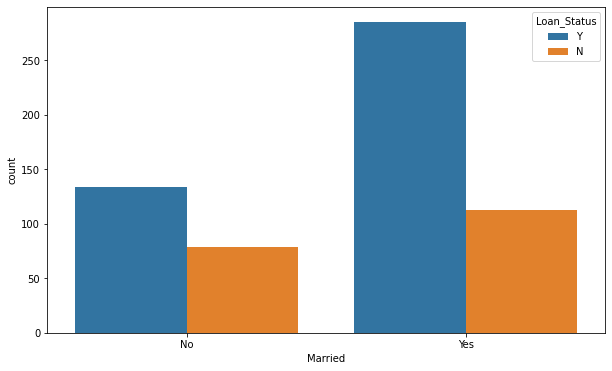

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Married", hue = "Loan_Status")
print("Those who are married and got loan approved:", mar_ap)
print("Those who are married and do not get loan approved:", mar_nap)
print("Those who are not married but get loan approved:", nmarr_ap)
print("Those who are not married and also do not get loan approved:", nmarr_nap)


In [121]:
l_aprvd["Married"].value_counts()

Yes    285
No     134
Name: Married, dtype: int64

### if you are married you have more chances to get loan approved 

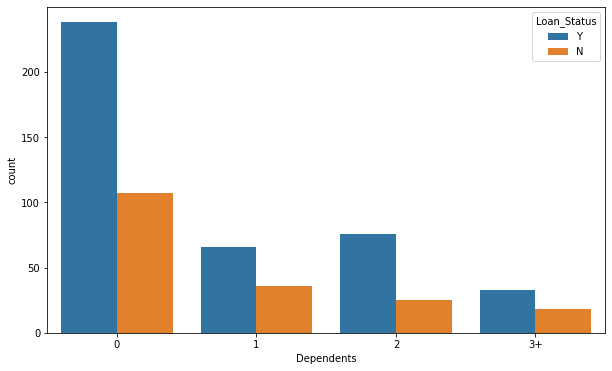

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Dependents", hue = "Loan_Status")

### Having less dependent then more chances to get loan approved

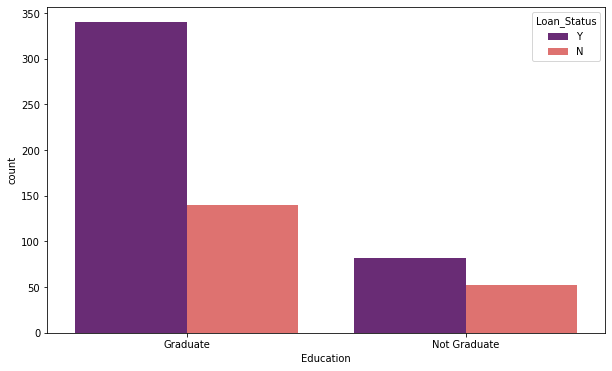

In [123]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Education", hue = "Loan_Status",palette='magma')

#### Graduated people have more chances 

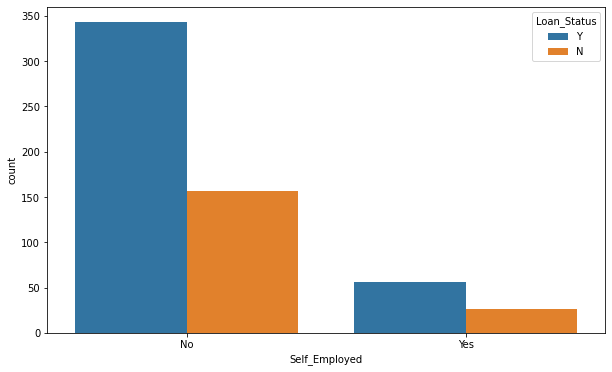

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Self_Employed", hue = "Loan_Status")

### other than self employeed people have more chances 

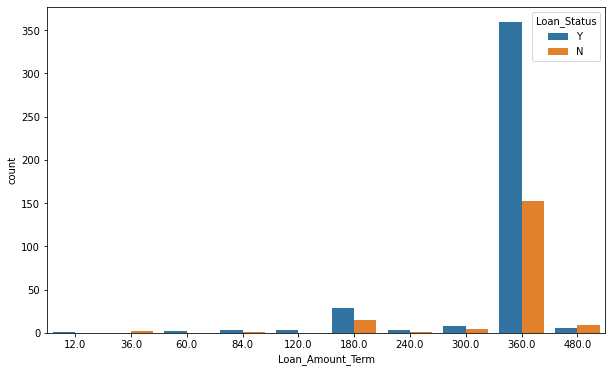

In [125]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Loan_Amount_Term", hue = "Loan_Status")

### 360 weeks are best  time period to get approve your loan 

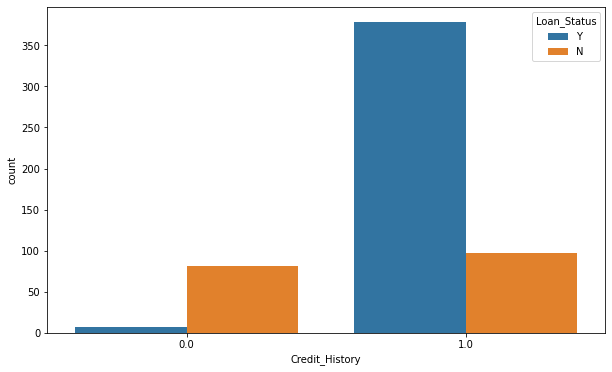

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Credit_History", hue = "Loan_Status")

#### No chance for to get approval if your credit history is not clear 

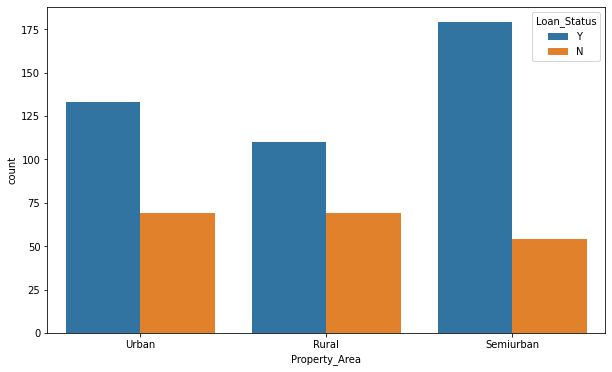

In [127]:
plt.figure(figsize=(10,6))
sns.countplot(data = data, x = "Property_Area", hue = "Loan_Status")

### Semiurban area have moe chances to get loan approved 

# Data Preprocessing

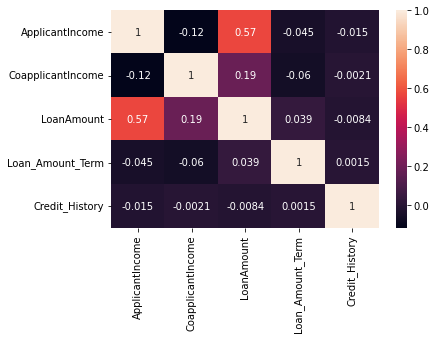

In [128]:
sns.heatmap(data.corr(), annot = True )

In [129]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are many missing values and we need to deal with it 

###### First i will fill categorical missing values 

In [130]:
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]= data["Married"].fillna(data["Married"].mode()[0])

In [131]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [132]:
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])

In [133]:
data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [134]:
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [135]:
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [136]:
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

### As loan amount is can varry person to person with good deviation so we will use either mean or mode 

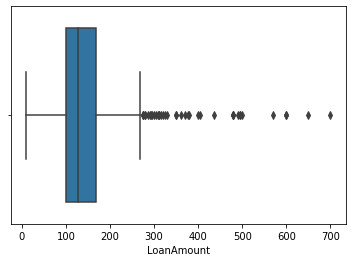

In [137]:
sns.boxplot(x = "LoanAmount", data = data)

##### we can see that some are their outliers so we will use median because it outlier does not effect on median 

In [138]:
data["LoanAmount"] =  data["LoanAmount"].fillna(data["LoanAmount"].median())

In [139]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

####  Now we have done with missing values and next step is label encoding 

# Label Encoding 
### model understands only numeric/tensor data  

In [140]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [142]:
object_col = data.select_dtypes("object").columns
for col in object_col:
    data[col]=le.fit_transform(data[col])

In [143]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [144]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### now we need to standarized or normalized the values for better results 

In [145]:
from sklearn.preprocessing import StandardScaler 

In [146]:
cols=['CoapplicantIncome','LoanAmount','ApplicantIncome','Loan_Amount_Term']
sc=StandardScaler()
for col in cols:
    data[col]=sc.fit_transform(data[col].values.reshape(-1,1))
data.head()    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,1


### Time for Feature Selection 

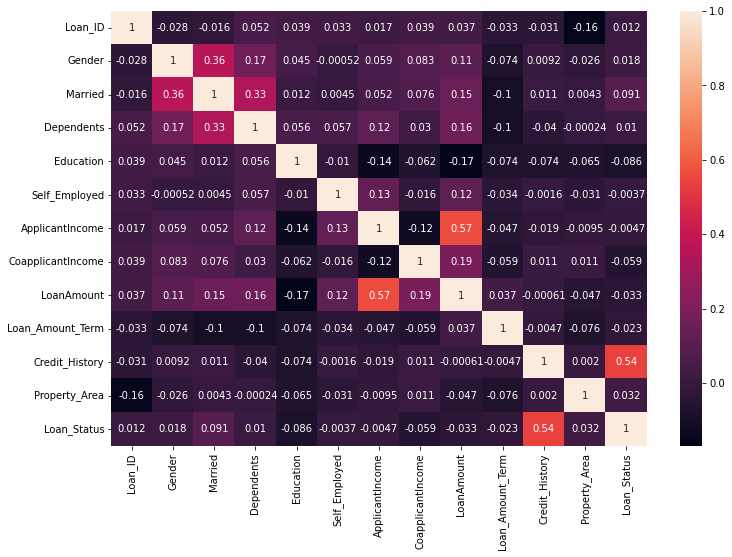

In [147]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True)

####  As we can see that Loan_ID and Property Area does not showing any good corelation with any other feature so I am gonna remove them from data because it is abundant 

In [148]:
data.drop(["Loan_ID","Property_Area"], axis =1, inplace = True)

In [149]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1


In [153]:
data.shape

(614, 11)

In [168]:
x = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


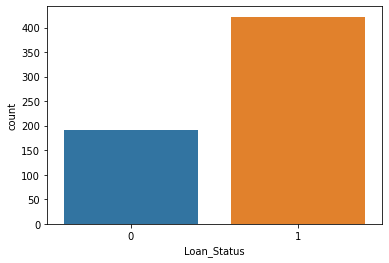

In [169]:
sns.countplot(y)

In [177]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

(844, 10) (844,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


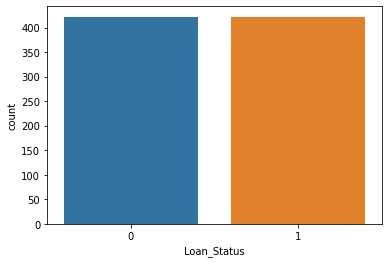

In [178]:
sns.countplot(y)

In [179]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [180]:
print(f'Shape of x_train is {x_train.shape}')
print(f'Shape of y_train is {y_train.shape}')
print(f'Shape of x_test is {x_test.shape}')
print(f'Shape of y_test is {y_test.shape}') 

Shape of x_train is (675, 10)
Shape of y_train is (675,)
Shape of x_test is (169, 10)
Shape of y_test is (169,)


In [181]:
print('Proportion of 0 in y_train :',y_train.value_counts()[0]/ len(y_train))
print('Proportion of 0 in y_test :',y_test.value_counts()[0]/ len(y_test))
print('Proportion of 1 in y_train :',y_train.value_counts()[1]/ len(y_train))
print('Proportion of 1 in y_test :',y_test.value_counts()[1]/ len(y_test))


Proportion of 0 in y_train : 0.49777777777777776
Proportion of 0 in y_test : 0.5088757396449705
Proportion of 1 in y_train : 0.5022222222222222
Proportion of 1 in y_test : 0.4911242603550296


# Logistic Regression

In [182]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)       # model training 

LogisticRegression(random_state=0, solver='liblinear')

In [183]:
y_pred = classifier_logreg.predict(x_test)
y_pred                                         # model testing 

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [184]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))   # model accuracy 

Accuracy Score: 0.6804733727810651


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


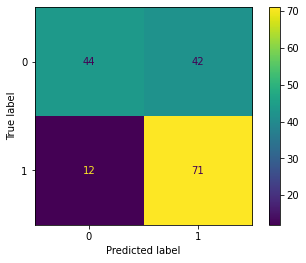

In [185]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)


# Using Different Algorithm 

In [186]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

model name  LogisticRegression()
accuracy  0.6863905325443787
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7041420118343196
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.7514792899408284
model name  KNeighborsClassifier()
accuracy  0.6982248520710059


In [188]:
import xgboost as xgb

xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=0.9, colsample_bytree=0.5, gamma=0,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_delta_step=0, max_depth=8, min_child_weight=0.8, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=9,
              objective='binary:hinge', random_state=0, reg_alpha=2,
              reg_lambda=3, sampling_method='uniform', scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, tree_method='hist',
              verbosity=1)

xgb.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.5,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_depth=8, min_child_weight=0.8, num_parallel_tree=9,
              objective='binary:hinge', reg_alpha=2, reg_lambda=3,
              sampling_method='uniform', subsample=0.8, tree_method='hist')

In [189]:
from sklearn import metrics
pred = xgb.predict(x_test)
print('acc',metrics.accuracy_score(y_test,pred))
print('f1',metrics.f1_score(y_test,pred))
print('matrix',metrics.confusion_matrix(y_test,pred))

acc 0.7218934911242604
f1 0.7431693989071038
matrix [[54 32]
 [15 68]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


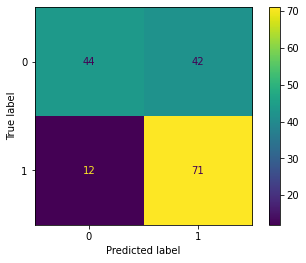

In [190]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)


## Finalized Algorithm RF

In [191]:
from sklearn.ensemble import RandomForestClassifier     # initilize 
classifier = RandomForestClassifier(max_samples=0.9)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9)

In [192]:
y_pred = classifier.predict(x_test)
y_pred                                      # fit 

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [193]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))   # accuracy 

Accuracy Score: 0.7692307692307693


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


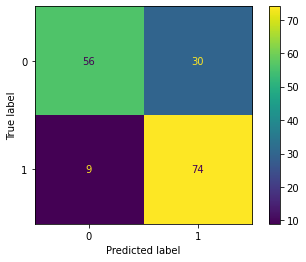

In [195]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)


In [196]:
import pickle
pickle.dump(rf, open('iri.pkl', 'wb'))

In [197]:
model=pickle.load(open('iri.pkl','rb'))

In [198]:
model.predict(np.array([1,0,0,0,0,8750,4167.0,308.0,360.0,1.0]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [199]:
model.predict(np.array([1,0,0,0,0,500,100,29,36.0,1]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [200]:
model.predict(np.array([0,0,1,0,0,12000,1000,3000,360.0,1]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [201]:
model.predict(np.array([1,1,1,1,1,2000,0,12,12,1]).reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [205]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0


# clustering

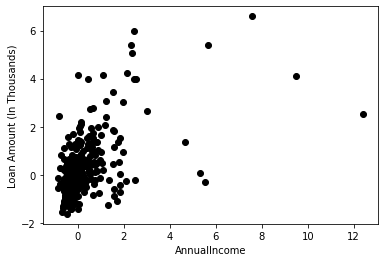

In [216]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

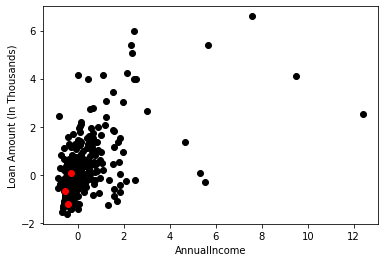

In [217]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [218]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.9838589296053163
1.0612932211327362
0.8728430309974963
0.866351481310105
0.8664127272582509
0.8706402528421939
1.1489150057032975
0.813004068248928
0.5849687803177159
1.0553314653825006
0.36421581130222536
0.5446146966496066
0.1526256709273076
0.07213315280877486
0.2637944950546159
0.26346734216987594
0.2847137002335935
0.021735384597544427
0.0


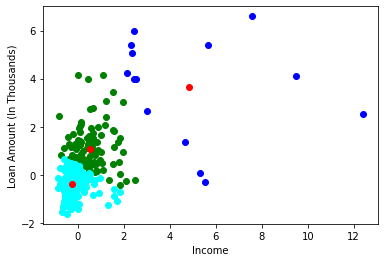

In [219]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()